In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [179]:
data = pd.read_csv('dailyActivity_merged.csv')
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


# <span style="text-align:center; font-weight:bold; font-size:32px;">Data cleaning</span>


In [164]:
print(data.isnull().sum())
# no miisng data 

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [165]:
print(data.info())
print("number of observations is "+str(len(data)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [166]:
# Changing datatype of ActivityDate
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"], 
                                      format="%m/%d/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [167]:
# combine all minutes:
data["TotalMinutes"] = data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] + data["SedentaryMinutes"]
print(data["TotalMinutes"].sample(5))

573     899
396    1033
67     1440
492    1440
746     989
Name: TotalMinutes, dtype: int64


<div style="
    font-weight:bold;
    font-size:32px;">
    Describitve Statistics
</div>

In [168]:
data.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767


<div style="
    font-weight:bold;
    font-size:32px;">
   Analysis
</div>

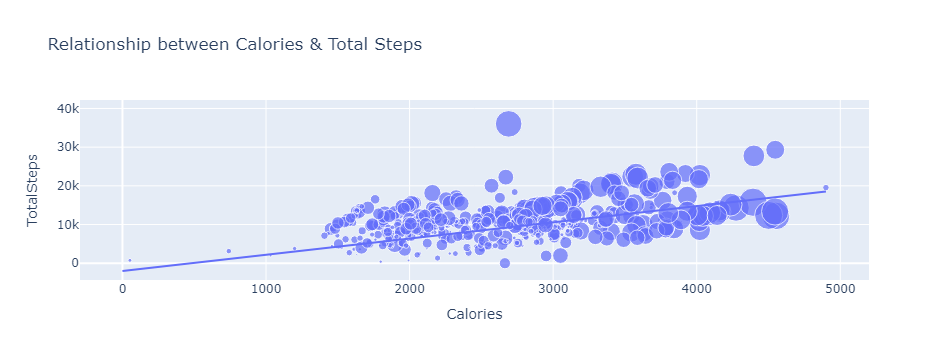

In [169]:
figure = px.scatter(data_frame = data, x="Calories",
                    y="TotalSteps", size="VeryActiveMinutes", 
                    trendline="ols", 
                    title="Relationship between Calories & Total Steps")
figure.show()

<div style="
    color : blue;font-weight:light;
    font-size:18px;">
    You can see that there is a linear relationship between the total number of steps and the number of calories burned in a day
</div>

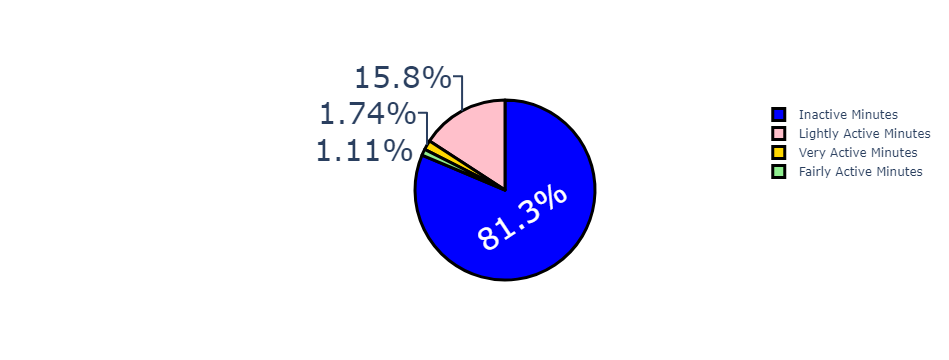

In [170]:

  label = ["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['gold','lightgreen', "pink", "blue"]

fig = go.Figure(go.Pie(labels=label, values=counts))
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=30,
    marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

<div style="
    color : green;font-weight:light;
    font-size:18px;">                                             
Observations : </div>

<div style="
    color : blue;font-weight:light;
    font-size:18px;">                                             
81.3% of Total inactive minutes in a day</div>
<div style="
    color : blue;font-weight:light;
    font-size:18px;">15.8% of Lightly active minutes in a day</div>
<div style="
    color : blue;font-weight:light;
    font-size:18px;">On an average, only 21 minutes (1.74%) were very active</div>
<div style="
    color : blue;font-weight:light;
    font-size:18px;">and 1.11% (13 minutes) of fairly active minutes in a day</div>
</div>

In [174]:
data["Day"] = data["ActivityDate"].dt.day_name()
print(data["Day"].head())

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object


<div style="
    font-weight:bold;
    font-size:18px;">

</div>

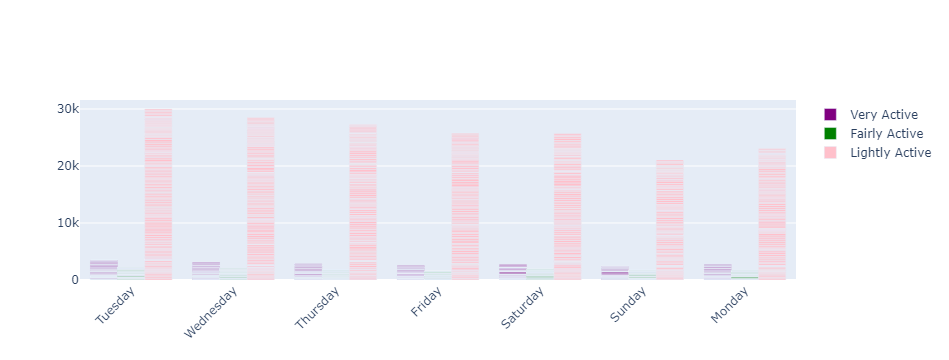

In [175]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["VeryActiveMinutes"],
    name='Very Active',
    marker_color='purple'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["FairlyActiveMinutes"],
    name='Fairly Active',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["LightlyActiveMinutes"],
    name='Lightly Active',
    marker_color='pink'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

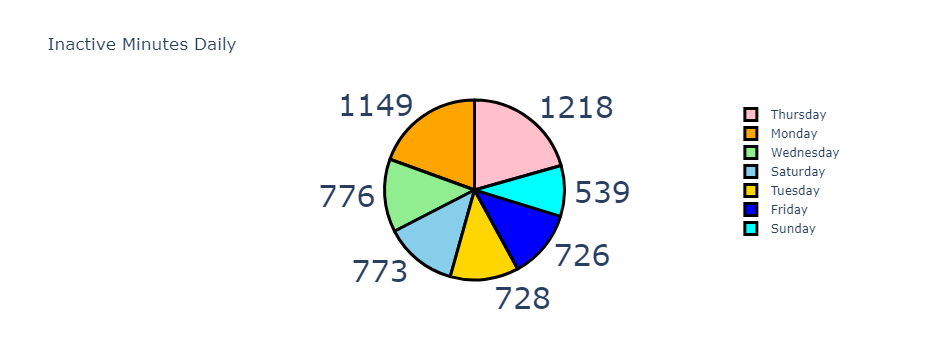

In [176]:
day = data["Day"].value_counts()
label = day.index
counts = data["SedentaryMinutes"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Inactive Minutes Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

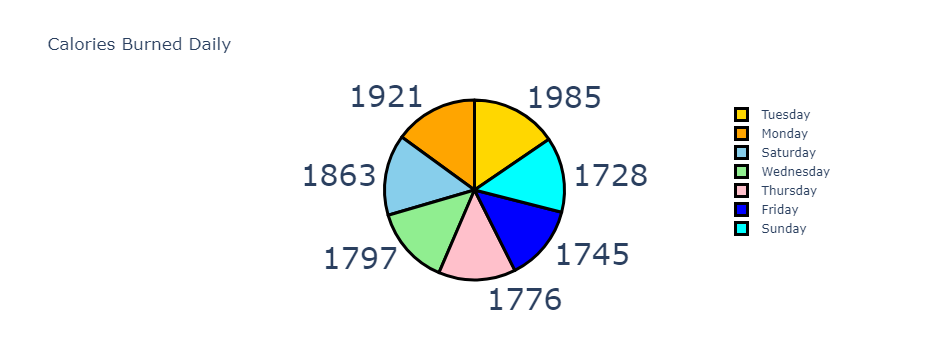

In [177]:
calories = data["Day"].value_counts()
label = calories.index
counts = data["Calories"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Calories Burned Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()



<div style="
    font-weight:bold;
    font-size:18px;">
Tuesday is, therefore, one of the most active days for all individuals in the dataset, as the highest number of calories were burned on Tuesdays.
So this is how you can analyze smartwatch data using the Python programming language. There is a lot more you can do with this dataset. You can also use it for predicting the number of calories burned in a day.

</div>

<div style="
    font-weight:bold;
    font-size:32px;">
Summary

</div>


<div style="
    font-weight:bold;
    font-size:18px;">
So this is how you can analyze the data collected by a smartwatch about fitness using Python. Smartwatches are preferred by people who like to take care of their fitness. Analyzing the data collected on your fitness is one of the use cases of Data Science in healthcare. I hope you liked this article on Smartwatch data analysis using Python. Feel free to ask valuable questions in the comments section below.


</div>